<a href="https://colab.research.google.com/github/arka57/Cardio_Vascular_Risk/blob/main/Cardio_Vascular_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
 from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [9]:
cd MyDrive/AlmaBetter/Project/Cardiovascular_disease_prediction

/gdrive/MyDrive/AlmaBetter/Project/Cardiovascular_disease_prediction


In [10]:
ls

 data_cardiovascular_risk.csv   model_xg.pkl
 model_scaler.pkl              'PS- Cardiovascular Risk Prediction.pdf'


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats import f_oneway
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
#importing dataset
data=pd.read_csv("data_cardiovascular_risk.csv")

In [13]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [15]:
#Checking for null values 

In [16]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [17]:
(data.isnull().sum()/len(data))*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [18]:
#columns with null values--education,cigperday,bpmeds,totchol,bmi,heartrate,glucose

In [19]:
#All columns have very less % of values as null. So they will be replaced with some values

In [20]:
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

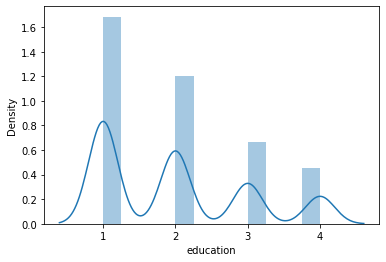

In [21]:
sns.distplot(data['education'])

In [22]:
#Education --can be treated as categorical variable only as it has only 4 possible values

In [23]:
data1=data.groupby(['education','TenYearCHD'])['education'].value_counts()

In [24]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [25]:
#Target variable is data is imbalanced. 
#It can be treated in various ways. here first accuracy metric will be changed and Decision Tree will be used

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

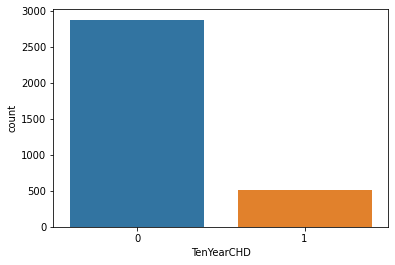

In [26]:
sns.countplot(data['TenYearCHD'])

In [27]:
#Independent Variables:
    #Numerical Variables

In [28]:
#id-Useless we will remove it

In [29]:
data.drop('id',axis=1,inplace=True)

In [30]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [31]:
#Handling the null values

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

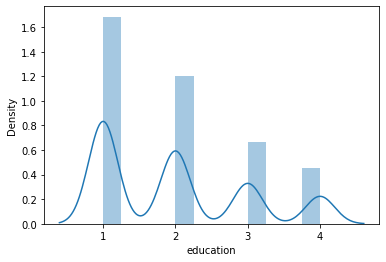

In [32]:
#Education

sns.distplot(data['education'])

In [33]:
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

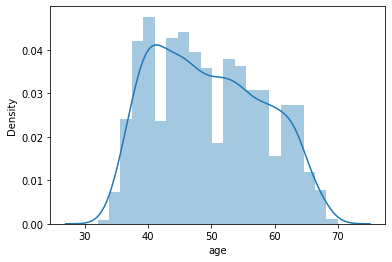

In [34]:
sns.distplot(data['age'])

In [35]:
x=['age',               
 'education',         
  'cigsPerDay',       
   'BPMeds',       
  'prevalentStroke',    
  'prevalentHyp',       
   'diabetes',           
  'totChol',          
  'sysBP',            
  'diaBP',            
  'BMI',              
  'heartRate',       
  'glucose',         
  'TenYearCHD']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

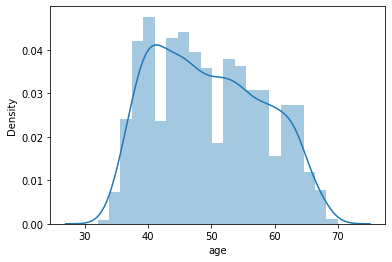

In [36]:
sns.distplot(data['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

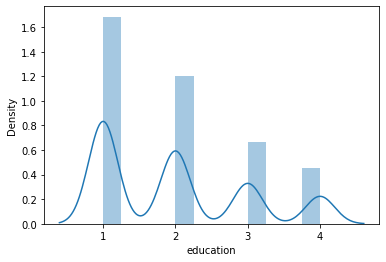

In [37]:
sns.distplot(data['education'])#categorical

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

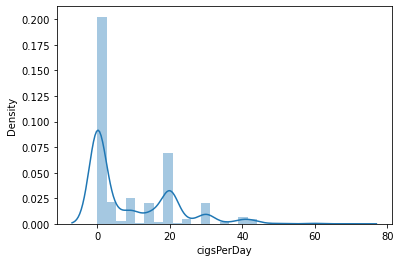

In [38]:
sns.distplot(data['cigsPerDay'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPMeds', ylabel='Density'>

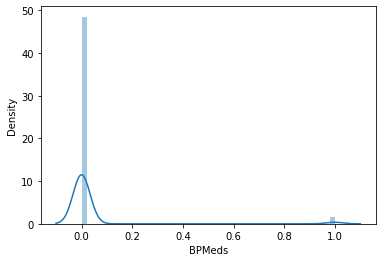

In [39]:
sns.distplot(data['BPMeds'])#Categorical

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevalentStroke', ylabel='Density'>

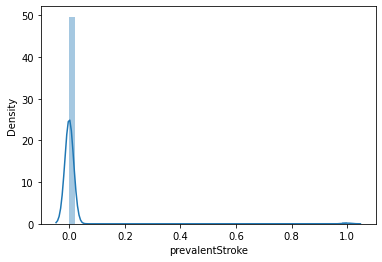

In [40]:
sns.distplot(data['prevalentStroke'])#categorical

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevalentHyp', ylabel='Density'>

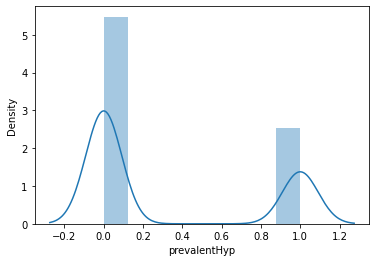

In [41]:
sns.distplot(data['prevalentHyp'])#categorical

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes', ylabel='Density'>

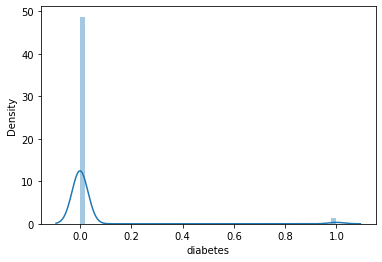

In [42]:
sns.distplot(data['diabetes'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totChol', ylabel='Density'>

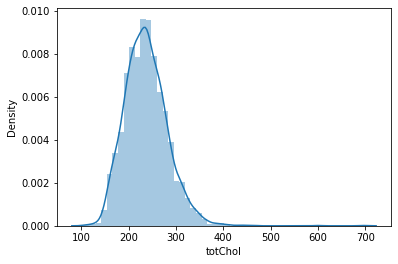

In [43]:
sns.distplot(data['totChol'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sysBP', ylabel='Density'>

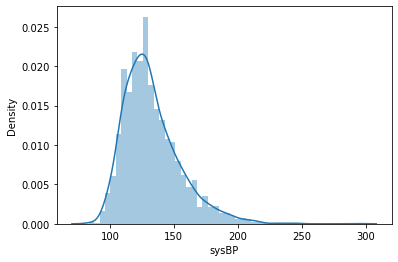

In [44]:
sns.distplot(data['sysBP'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diaBP', ylabel='Density'>

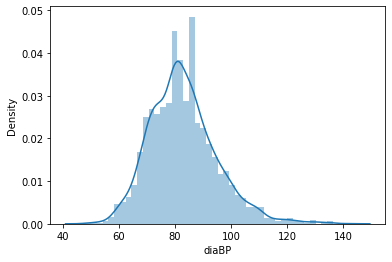

In [45]:
sns.distplot(data['diaBP'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

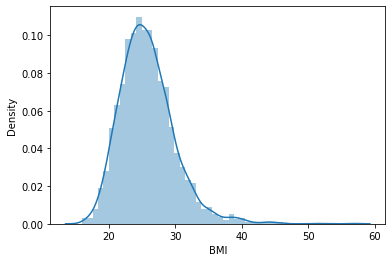

In [46]:
sns.distplot(data['BMI'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartRate', ylabel='Density'>

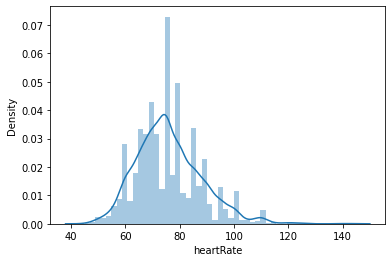

In [47]:
sns.distplot(data['heartRate'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

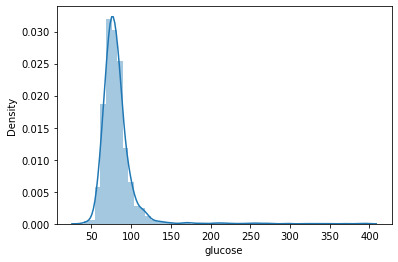

In [48]:
sns.distplot(data['glucose'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

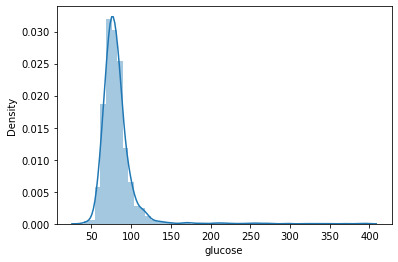

In [49]:
sns.distplot(data['glucose'])

In [50]:
#On further analysis found out that there are some more categorical variables
#education,diabetes,prevalentHyp,prevalentStroke,BPMeds
#sex,is_smoking --originally categorical variables

In [51]:
data['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [52]:
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [53]:
#columns with null values--education,cigperday,bpmeds,totchol,bmi,heartrate,glucose

In [54]:
#categorical columns having null value--education,bpmeds-->replaced with mode(most frequent)
#for numerical values-->replaced with median

In [55]:
cat=['education','BPMeds']


In [56]:
simple_imputer=SimpleImputer(strategy='most_frequent')
simple_imputer.fit(data[cat])
data[cat]=simple_imputer.transform(data[cat])

In [57]:
data.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [58]:
#cigsPerDay,totChol,BMI,heartRate,glucose

In [59]:
num=['cigsPerDay','totChol','BMI','heartRate','glucose']

In [60]:
simple_imputer2=SimpleImputer(strategy='median')
simple_imputer2.fit(data[num])
data[num]=simple_imputer2.transform(data[num])

In [61]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [62]:
#Now EDA on numerical and categorical variables.

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [64]:
#Categorical education,diabetes,prevalentHyp,prevalentStroke,BPMeds

In [65]:
#Numerical--age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate

In [66]:
#EDA on numerical variables

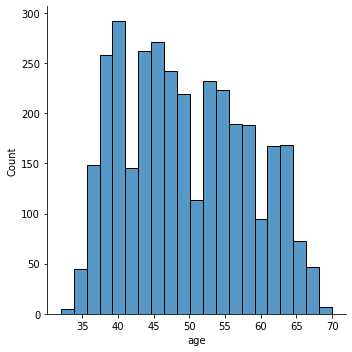

In [67]:
sns.displot(data['age'])

In [68]:
data['age'].max()

70

In [69]:
data['age'].min()

32

In [70]:
data['binned_age']=data['age'].apply(lambda x: x-x%5)

In [71]:
data[['age','binned_age']].head(10)

,age,binned_age
0,64,60
1,36,35
2,46,45
3,50,50
4,64,60
5,61,60
6,61,60
7,36,35
8,41,40
9,55,55


<AxesSubplot:xlabel='binned_age', ylabel='TenYearCHD'>

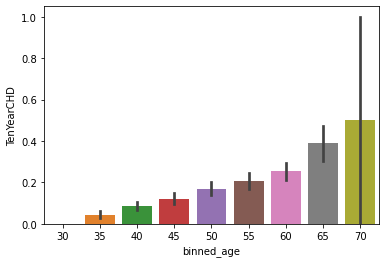

In [72]:
sns.barplot(x='binned_age',y='TenYearCHD',data=data)

In [73]:
#So after binning ages we see for higher age group people tenyearCHD increases.

In [74]:
#box plot very well describes relation between numerical and categorical variable

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

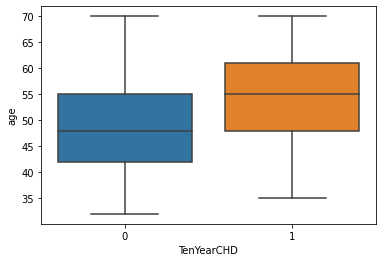

In [75]:
sns.boxplot(y='age',x='TenYearCHD',data=data)# So higher age people has a higher no people with cardio vascular disease

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

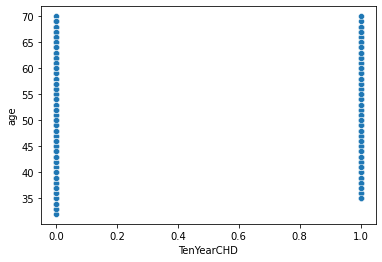

In [76]:
sns.scatterplot(y=data['age'],x=data['TenYearCHD'])#Scatter plot will not work here as target variable is categorical

In [77]:
alpha=0.01

In [78]:
def cont_dependency(feature,alpha=alpha):
  F, p = f_oneway(data[data['TenYearCHD'] == 1][feature], data[data['TenYearCHD'] == 0][feature])
  print('significance=%.3f, p=%.5f' % (alpha, p))
  if p <= alpha:
    print('Ten year Risk of CHD is dependent on the continuous variable')
    return True
  else:
    print('Ten year Risk of CHD is not dependent on continuous variable')
    return False

In [79]:
cont_dependency('age')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

In [80]:
#need to understand anova test 

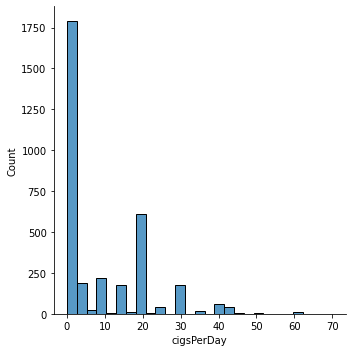

In [81]:
sns.displot(data['cigsPerDay'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

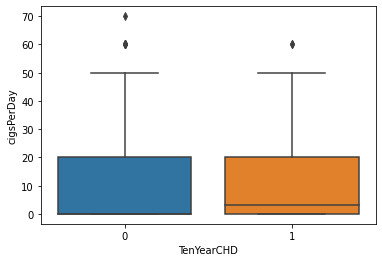

In [82]:
sns.boxplot(x='TenYearCHD',y='cigsPerDay',data=data)

In [83]:
#for cigper day also tenyearchd(1) has higher median 

In [84]:
cont_dependency('cigsPerDay')

significance=0.010, p=0.00007
Ten year Risk of CHD is dependent on the continuous variable


True

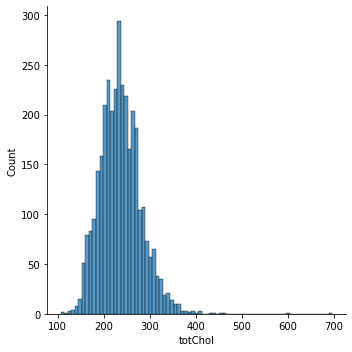

In [85]:
sns.displot(data['totChol'])

In [86]:
data['totChol'].max()

696.0

In [87]:
data['totChol'].min()

107.0

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

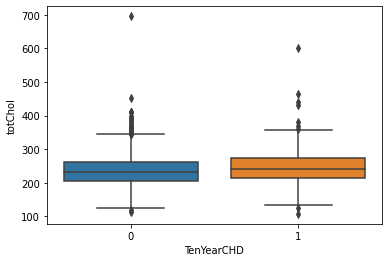

In [88]:
sns.boxplot(x='TenYearCHD',y='totChol',data=data)

In [89]:
#here for totchol there are a lot of outliers. Otherwise both classes have more or less same median

In [90]:
#binning the totchol in bins of size 50

data['binned_totchol']=data['totChol'].apply(lambda x:x-x%50)

<AxesSubplot:xlabel='binned_totchol', ylabel='TenYearCHD'>

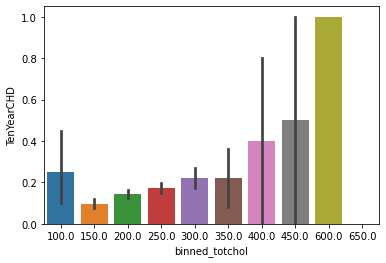

In [91]:
sns.barplot(x='binned_totchol',y='TenYearCHD',data=data)

In [92]:
cont_dependency('totChol')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

In [93]:
#Lets remove the outliers-->outliers will be replaced with median values

In [94]:
#After removing outliers from the model

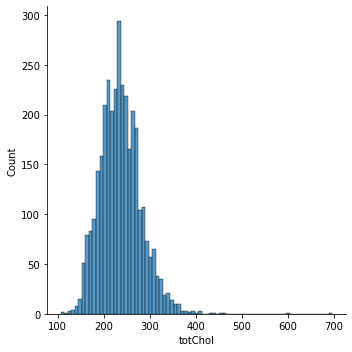

In [95]:
sns.displot(data['totChol'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

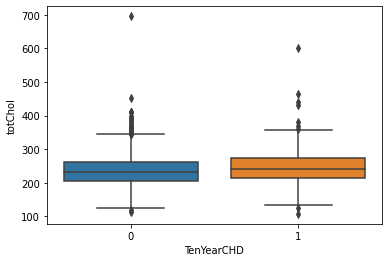

In [96]:
sns.boxplot(x='TenYearCHD',y='totChol',data=data)

In [97]:
data['binned_totchol']=data['totChol'].apply(lambda x:x-x%50)

<AxesSubplot:xlabel='binned_totchol', ylabel='TenYearCHD'>

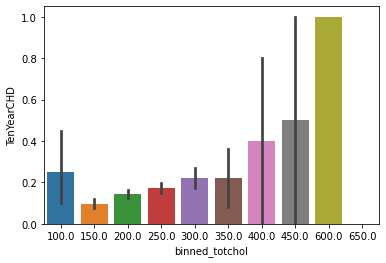

In [98]:
sns.barplot(x='binned_totchol',y='TenYearCHD',data=data)

In [99]:
#here also trend of higher tenCHD for higher totchol

In [100]:
#sysBP,diaBP,BMI,heartRate

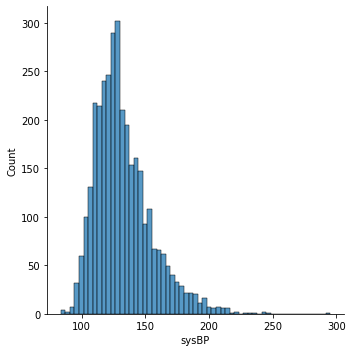

In [101]:
sns.displot(data['sysBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

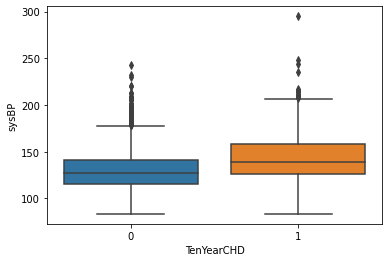

In [102]:
sns.boxplot(x='TenYearCHD',y='sysBP',data=data)

In [103]:
#here also lot of outliers are there

In [104]:
sys_bp_values=data.sysBP.quantile([0.25,0.75])
iqr=sys_bp_values.values[1]-sys_bp_values.values[0]
min_limit=sys_bp_values.values[0]-iqr*1.5
max_limit=sys_bp_values.values[1]+iqr*1.5
data['sysBP']=data['sysBP'].apply(lambda x:x if x>min_limit and x<max_limit else data['sysBP'].median())

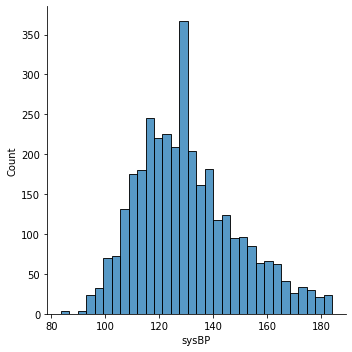

In [105]:
sns.displot(data['sysBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

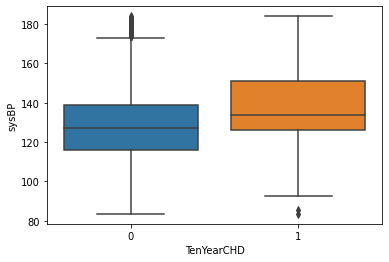

In [106]:
sns.boxplot(x='TenYearCHD',y='sysBP',data=data)

In [107]:
cont_dependency('sysBP')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

In [108]:
#here also we can see some higher chance of CHD for higher sysBP

In [109]:
data['binned_sysBP']=data['sysBP'].apply(lambda x:x-x%20)

<AxesSubplot:xlabel='binned_sysBP', ylabel='TenYearCHD'>

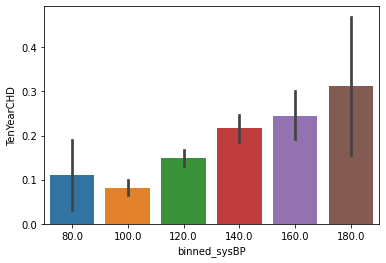

In [110]:
sns.barplot(x='binned_sysBP',y='TenYearCHD',data=data)

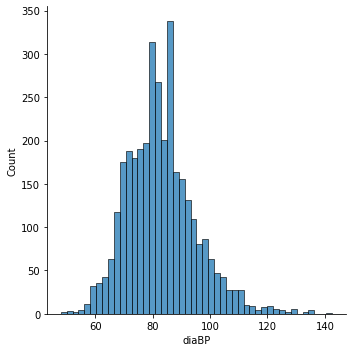

In [111]:
sns.displot(data['diaBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

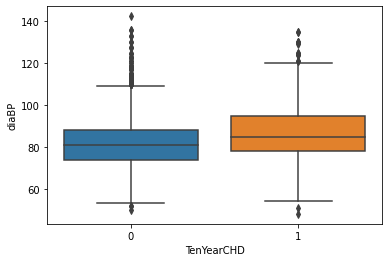

In [112]:
sns.boxplot(x='TenYearCHD',y='diaBP',data=data)

In [113]:
#again lot of outliers
#still higher diabp means higher TenYearCHD

In [114]:
#Remove outliers

In [115]:
dia_bp_values=data.diaBP.quantile([0.25,0.75])
iqr=dia_bp_values.values[1]-dia_bp_values.values[0]
min_limit=dia_bp_values.values[0]-iqr*1.5
max_limit=dia_bp_values.values[1]+iqr*1.5
data['diaBP']=data['diaBP'].apply(lambda x:x if x>min_limit and x<max_limit else data['diaBP'].median())

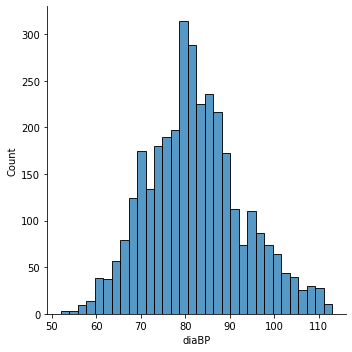

In [116]:
sns.displot(data['diaBP'])

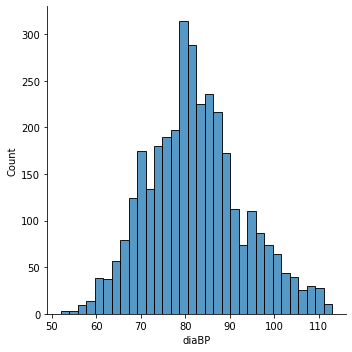

In [117]:
sns.displot(data['diaBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

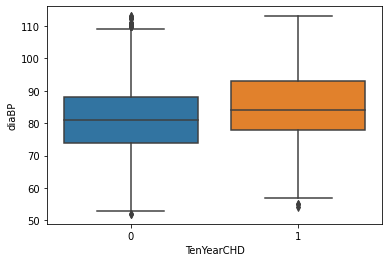

In [118]:
sns.boxplot(x='TenYearCHD',y='diaBP',data=data)

In [119]:
cont_dependency('diaBP')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

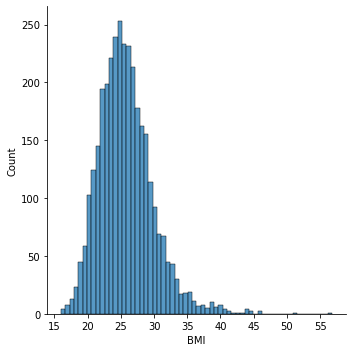

In [120]:
sns.displot(data['BMI'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

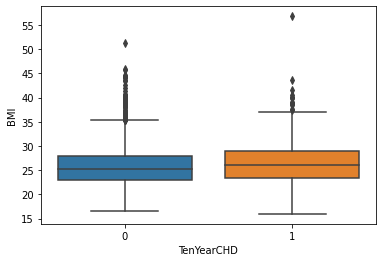

In [121]:
sns.boxplot(x='TenYearCHD',y='BMI',data=data)

In [122]:
#removing outliers

In [123]:
BMI_values=data.BMI.quantile([0.25,0.75])
iqr=BMI_values.values[1]-BMI_values.values[0]
min_limit=BMI_values.values[0]-iqr*1.5
max_limit=BMI_values.values[1]+iqr*1.5
data['BMI']=data['BMI'].apply(lambda x:x if x>min_limit and x<max_limit else data['BMI'].median())

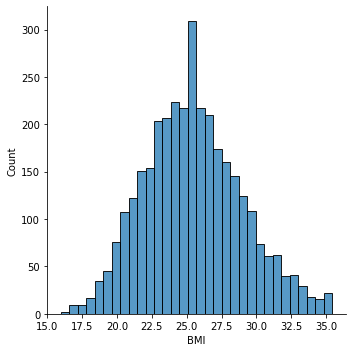

In [124]:
sns.displot(data['BMI'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

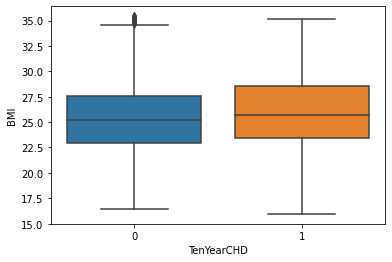

In [125]:
sns.boxplot(x='TenYearCHD',y='BMI',data=data)

In [126]:
#nearly similar trends

In [127]:
data['binned_BMI']=data['BMI'].apply(lambda x:x-x%3)

<AxesSubplot:xlabel='binned_BMI', ylabel='TenYearCHD'>

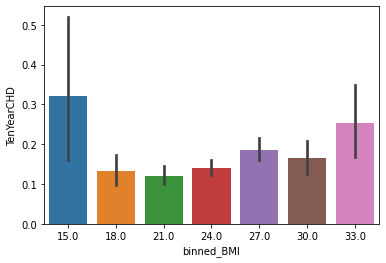

In [128]:
sns.barplot(x='binned_BMI',y='TenYearCHD',data=data)

In [129]:
#No clear cut trend can be observed

In [130]:
cont_dependency('BMI')

significance=0.010, p=0.00072
Ten year Risk of CHD is dependent on the continuous variable


True

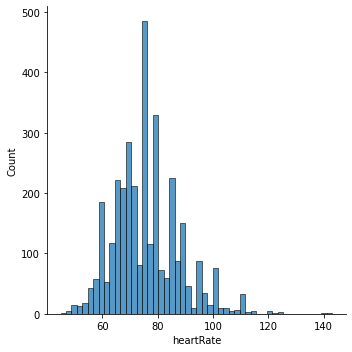

In [131]:
sns.displot(data['heartRate'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='heartRate'>

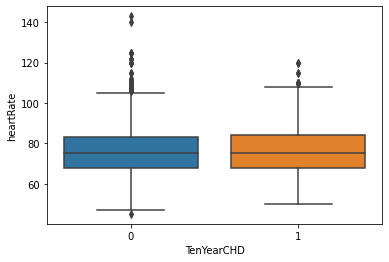

In [132]:
sns.boxplot(x='TenYearCHD',y='heartRate',data=data)

In [133]:
#removing outliers

In [134]:
h=data.heartRate.quantile([0.25,0.75])
iqr=h.values[1]-h.values[0]
min_limit=h.values[0]-iqr*1.5
max_limit=h.values[1]+iqr*1.5
data['heartRate']=data['heartRate'].apply(lambda x:x if x>min_limit and x<max_limit else data['heartRate'].median())

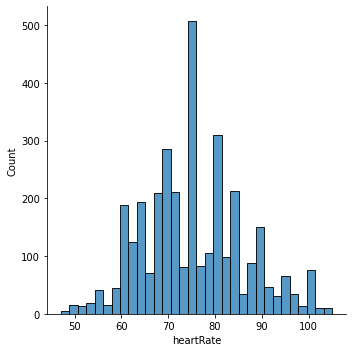

In [135]:
sns.displot(data['heartRate'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='heartRate'>

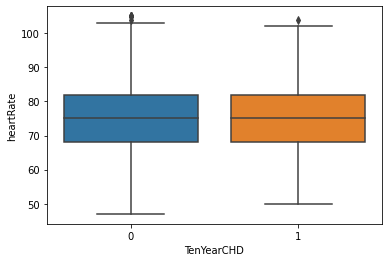

In [136]:
sns.boxplot(x='TenYearCHD',y='heartRate',data=data)

In [137]:
#no trend visible

In [138]:
data['binned_heartRate']=data['heartRate'].apply(lambda x:x-x%10)

<AxesSubplot:xlabel='binned_heartRate', ylabel='TenYearCHD'>

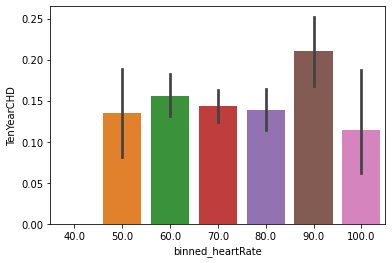

In [139]:
sns.barplot(x='binned_heartRate',y='TenYearCHD',data=data)

In [140]:
#no trend visible

In [141]:
cont_dependency('heartRate')

significance=0.010, p=0.46350
Ten year Risk of CHD is not dependent on continuous variable


False

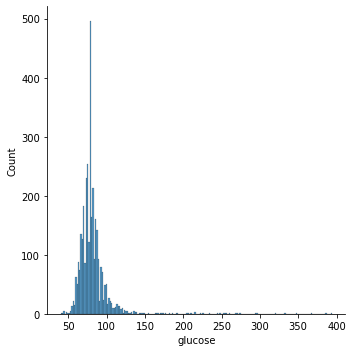

In [142]:
sns.displot(data['glucose'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

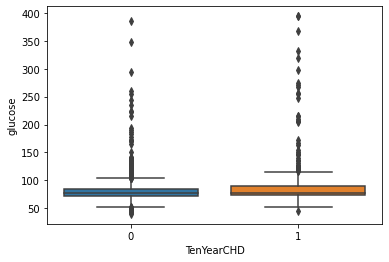

In [143]:
sns.boxplot(x='TenYearCHD',y='glucose',data=data)

In [144]:
#Removing outliers
h=data.glucose.quantile([0.25,0.75])
iqr=h.values[1]-h.values[0]
min_limit=h.values[0]-iqr*1.5
max_limit=h.values[1]+iqr*1.5
data['glucose']=data['glucose'].apply(lambda x:x if x>min_limit and x<max_limit else data['glucose'].median())

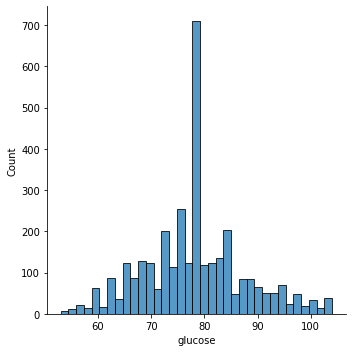

In [145]:
sns.displot(data['glucose'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

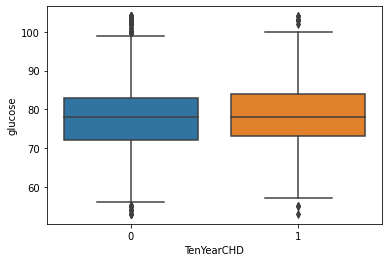

In [146]:
sns.boxplot(x='TenYearCHD',y='glucose',data=data)

In [147]:
#no great trend

In [148]:
#Checking Co-relation between the independent continuous variables(Multicollinearity)

In [149]:
num=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

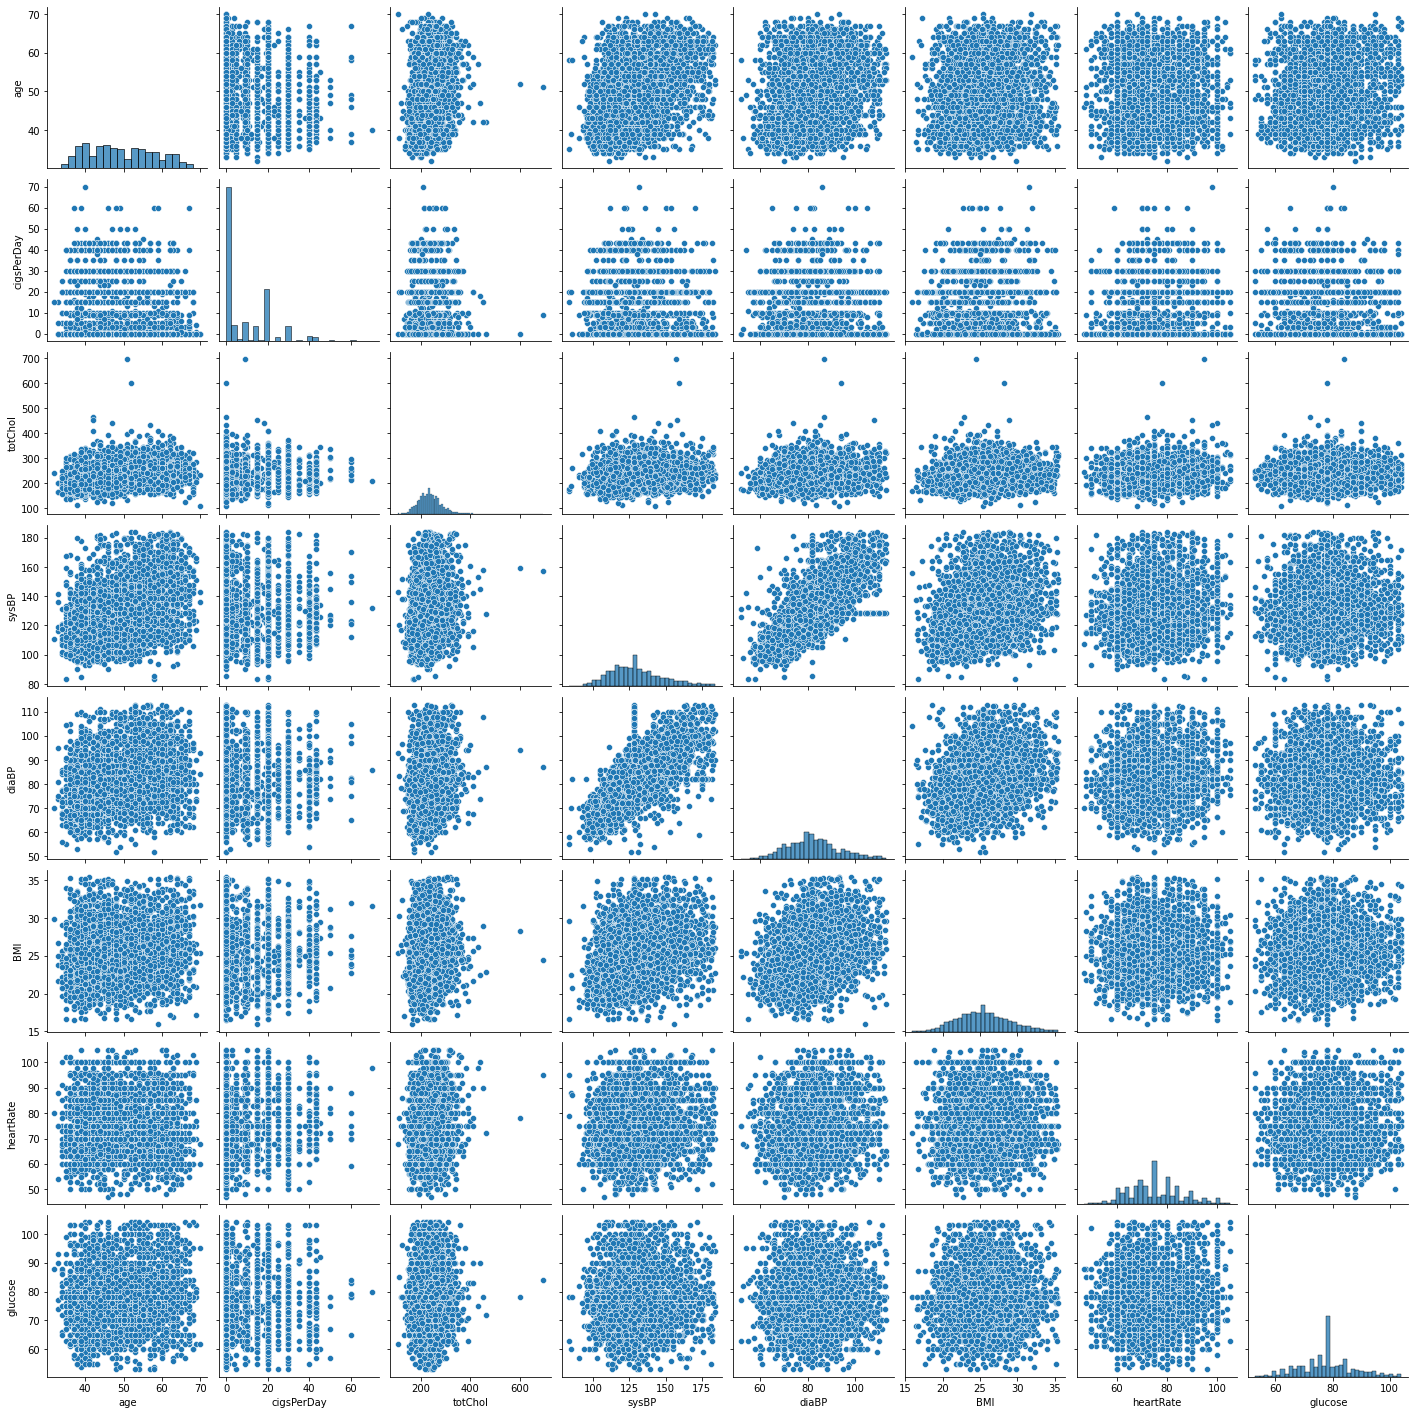

In [150]:
sns.pairplot(data[num])

In [151]:
#sysBP and diaBP seems to be correlated

<AxesSubplot:>

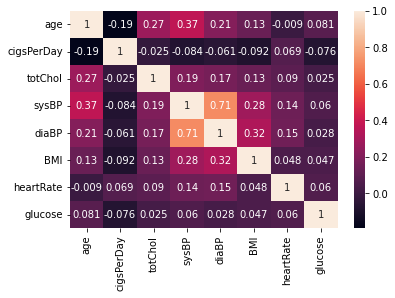

In [152]:
sns.heatmap(data[num].corr(),annot=True)#correlation matrix

In [153]:
#again from corrleation matrix we can say sysBP and diaBP are highly correlated

In [154]:
#EDA for categorical variables

In [155]:
#Categorical education,diabetes,prevalentHyp,prevalentStroke,BPMeds,,is_smoking,sex

In [156]:
data['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

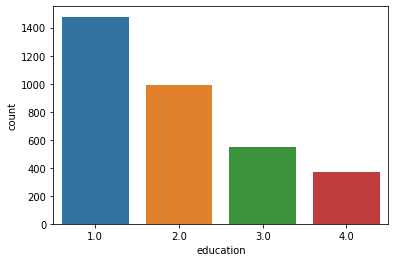

In [157]:
sns.countplot(data['education'])

<AxesSubplot:xlabel='education', ylabel='count'>

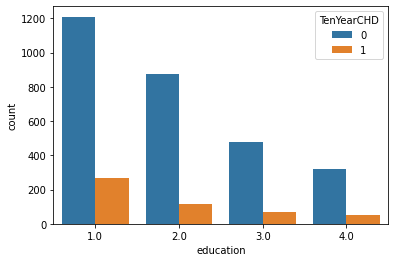

In [158]:
sns.countplot(x='education',hue='TenYearCHD',data=data)

<AxesSubplot:xlabel='education', ylabel='Percent'>

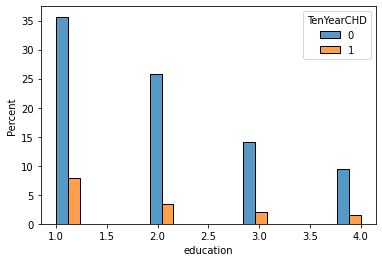

In [159]:
sns.histplot(x='education',hue='TenYearCHD',stat='percent',multiple='dodge',data=data)

Text(0, 0.5, '%')

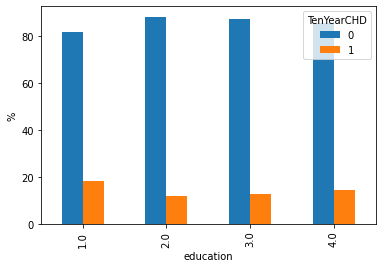

In [160]:
freq_data=data_education=data.groupby('TenYearCHD')['education'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [161]:
prob = 0.99
alpha = 1.0 - prob

In [162]:
# using chi-square statistic to determine any dependency between categorical variables
def cat_dependency(freq_df, alpha=alpha, verbose=True):
  stat, p, dof, expected = chi2_contingency(freq_df)
  if p <= alpha:
    if verbose:
      print('significance=%.3f, p=%.7f' % (alpha, p))
      print('Categorical variables are dependent')
    return True
  else:
    if verbose:
      print('significance=%.3f, p=%.7f' % (alpha, p))
      print('Categorical variables are not dependent')
    return False

In [163]:
data.groupby('education')['education'].count()

education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

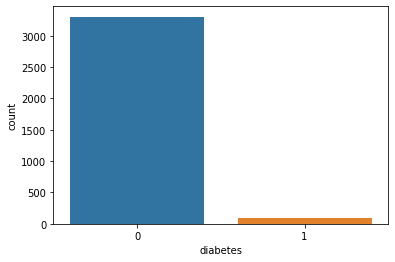

In [164]:
sns.countplot(data['diabetes'])

Text(0, 0.5, '%')

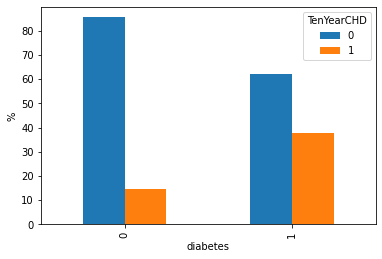

In [165]:
freq_data=data_education=data.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [166]:
#those who have diabetes have relatively higher chance of chd

In [167]:
cat_dependency(freq_data)

significance=0.010, p=0.0000000
Categorical variables are dependent


True

In [168]:
#prevalentHyp,prevalentStroke,BPMeds,,is_smoking,sex

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

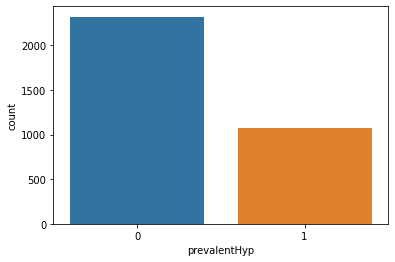

In [169]:
sns.countplot(data['prevalentHyp'])

Text(0, 0.5, '%')

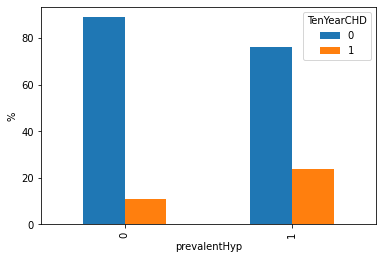

In [170]:
freq_data=data_education=data.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [171]:
cat_dependency(freq_data)

significance=0.010, p=0.0000000
Categorical variables are dependent


True

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

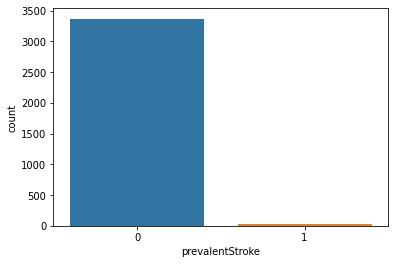

In [172]:
sns.countplot(data['prevalentStroke'])

In [173]:
data['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [174]:
#very less 1 values

Text(0, 0.5, '%')

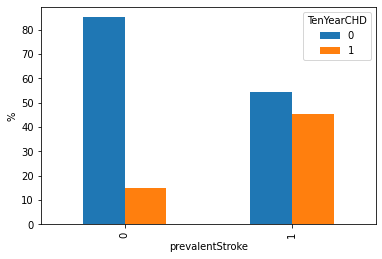

In [175]:
freq_data=data_education=data.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [176]:
#clearly prevalentStroke 1 has higher% of peopele having TenCHD

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BPMeds', ylabel='count'>

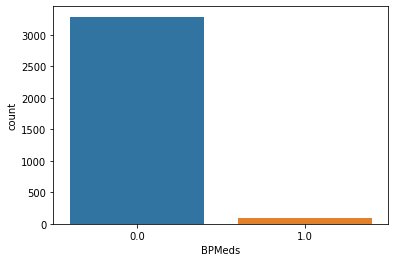

In [177]:
sns.countplot(data['BPMeds'])

Text(0, 0.5, '%')

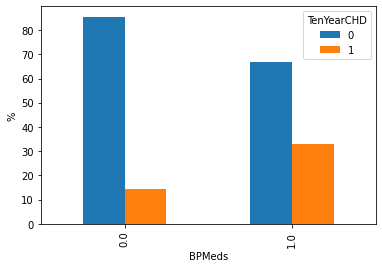

In [178]:
freq_data=data_education=data.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [179]:
#clearly BPmeds 1 has higher% of peopele having TenCHD

In [180]:
cat_dependency(freq_data)

significance=0.010, p=0.0000008
Categorical variables are dependent


True

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_smoking', ylabel='count'>

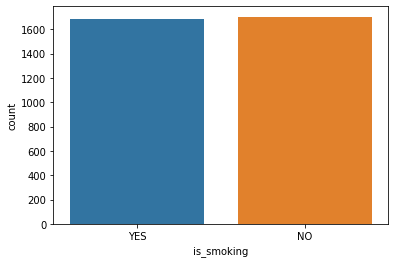

In [181]:
sns.countplot(data['is_smoking'])

Text(0, 0.5, '%')

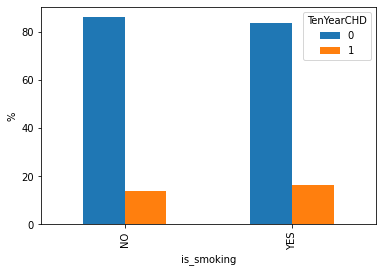

In [182]:
freq_data=data_education=data.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [183]:
#No trend is visible

In [184]:
cat_dependency(freq_data)

significance=0.010, p=0.0523906
Categorical variables are not dependent


False

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

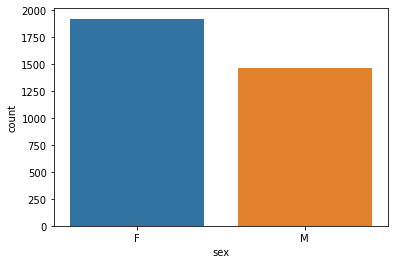

In [185]:
sns.countplot(data['sex'])

Text(0, 0.5, '%')

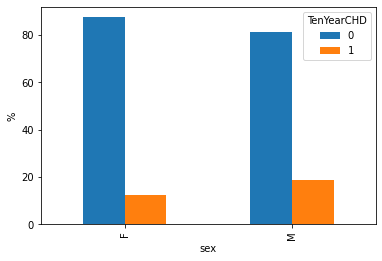

In [186]:
freq_data=data_education=data.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [187]:
#very slight trend may be there

In [188]:
cat_dependency(freq_data)

significance=0.010, p=0.0000011
Categorical variables are dependent


True

In [189]:
cat1=['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [190]:
data[cat1]

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,2.0,F,YES,0.0,0,0,0
1,4.0,M,NO,0.0,0,1,0
2,1.0,F,YES,0.0,0,0,0
3,1.0,M,YES,0.0,0,1,0
4,1.0,F,YES,0.0,0,0,0
...,...,...,...,...,...,...,...
3385,1.0,F,NO,0.0,0,0,0
3386,1.0,F,NO,0.0,0,0,0
3387,3.0,M,YES,0.0,0,1,0
3388,1.0,M,NO,0.0,0,1,0


<AxesSubplot:>

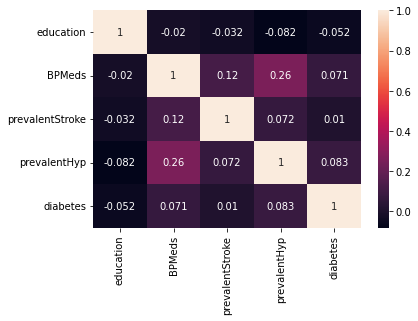

In [191]:
sns.heatmap(data[cat1].corr(),annot=True)

In [192]:
#Encoding for sex and is_smoking
#male-1 female-0
#true-1 false-0 isSmoking
data1=data.copy()

In [193]:
data1['sex']=data1['sex'].apply(lambda x: 1 if x=='M' else 0)

In [194]:
data1['is_smoking']=data1['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

<AxesSubplot:>

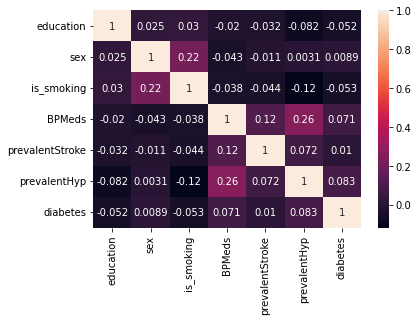

In [195]:
sns.heatmap(data1[cat1].corr(),annot=True)

In [196]:
#NO such high degree of correlation

<AxesSubplot:>

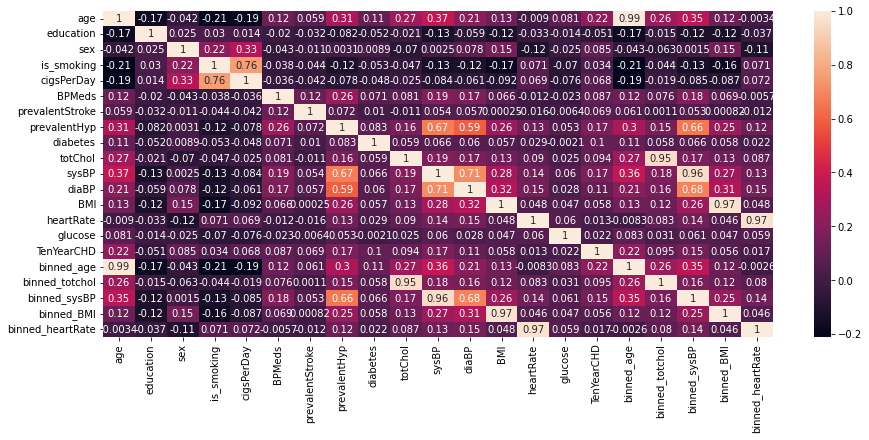

In [197]:
plt.figure(figsize=(15,6))
sns.heatmap(data1.corr(),annot=True)

In [198]:
#We can high correlation b/w:
#is_smoking and cigs_per day
#sysBP and prevalentHP

In [199]:
#Doing further VIF test

def cal_vif(X):
    vif=pd.DataFrame()
    vif["column"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [200]:
#Vif is less than 10

In [201]:
data1.columns#-cat1

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'binned_age',
       'binned_totchol', 'binned_sysBP', 'binned_BMI', 'binned_heartRate'],
      dtype='object')

In [202]:
num=[ i for i in data1.columns if i not in cat1]

In [203]:
num

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'binned_age',
 'binned_totchol',
 'binned_sysBP',
 'binned_BMI',
 'binned_heartRate']

In [204]:
num1=[i for i in num if i not in {'TenYearCHD','diaBP'}]

In [205]:
cal_vif(data1[num])

,column,VIF
0,age,1271.112954
1,cigsPerDay,1.639093
2,totChol,306.454512
3,sysBP,649.464187
4,diaBP,122.065258
5,BMI,928.971331
6,heartRate,754.001161
7,glucose,51.626573
8,TenYearCHD,1.253545
9,binned_age,1157.010931


In [206]:
#removing diaBP and calculating VIF
num1=[i for i in num if i not in {'TenYearCHD','diaBP'}]

In [207]:
cal_vif(data1[num1])

,column,VIF
0,age,1271.031717
1,cigsPerDay,1.622194
2,totChol,305.877676
3,sysBP,592.761283
4,BMI,922.467194
5,heartRate,751.758846
6,glucose,51.067473
7,binned_age,1156.073328
8,binned_totchol,230.493225
9,binned_sysBP,469.570631


In [208]:
num1=[i for i in num if i not in {'TenYearCHD','diaBP'}]

In [209]:
cal_vif(data1[num1])

,column,VIF
0,age,1271.031717
1,cigsPerDay,1.622194
2,totChol,305.877676
3,sysBP,592.761283
4,BMI,922.467194
5,heartRate,751.758846
6,glucose,51.067473
7,binned_age,1156.073328
8,binned_totchol,230.493225
9,binned_sysBP,469.570631


In [210]:
#Cigs_per_day can be kept and is_smoking removed
#prevalentHP can be removed and sysBP is kept

In [211]:
#Feature Engineering

In [212]:
data=data.drop('diaBP',axis=1)

In [213]:
data=data.drop('is_smoking',axis=1)

In [214]:
data=data.drop('prevalentHyp',axis=1)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   int64  
 1   education         3390 non-null   float64
 2   sex               3390 non-null   object 
 3   cigsPerDay        3390 non-null   float64
 4   BPMeds            3390 non-null   float64
 5   prevalentStroke   3390 non-null   int64  
 6   diabetes          3390 non-null   int64  
 7   totChol           3390 non-null   float64
 8   sysBP             3390 non-null   float64
 9   BMI               3390 non-null   float64
 10  heartRate         3390 non-null   float64
 11  glucose           3390 non-null   float64
 12  TenYearCHD        3390 non-null   int64  
 13  binned_age        3390 non-null   int64  
 14  binned_totchol    3390 non-null   float64
 15  binned_sysBP      3390 non-null   float64
 16  binned_BMI        3390 non-null   float64


In [216]:
#now encode sex variable --One Hot Encoder

In [217]:
dummy_gender=pd.get_dummies(data['sex'],prefix='Sex_')

In [218]:
data=pd.merge(left=data,right=dummy_gender,left_index=True,right_index=True)

In [219]:
data.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,binned_age,binned_totchol,binned_sysBP,binned_BMI,binned_heartRate,Sex__F,Sex__M
0,64,2.0,F,3.0,0.0,0,0,221.0,148.0,25.38,90.0,80.0,1,60,200.0,140.0,24.0,90.0,1,0
1,36,4.0,M,0.0,0.0,0,0,212.0,168.0,29.77,72.0,75.0,0,35,200.0,160.0,27.0,70.0,0,1
2,46,1.0,F,10.0,0.0,0,0,250.0,116.0,20.35,88.0,94.0,0,45,250.0,100.0,18.0,80.0,1,0
3,50,1.0,M,20.0,0.0,0,0,233.0,158.0,28.26,68.0,94.0,1,50,200.0,140.0,27.0,60.0,0,1
4,64,1.0,F,30.0,0.0,0,0,241.0,136.5,26.42,70.0,77.0,0,60,200.0,120.0,24.0,70.0,1,0


In [220]:
data=data.drop('sex',axis=1)

In [221]:
data.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,binned_age,binned_totchol,binned_sysBP,binned_BMI,binned_heartRate,Sex__F,Sex__M
0,64,2.0,3.0,0.0,0,0,221.0,148.0,25.38,90.0,80.0,1,60,200.0,140.0,24.0,90.0,1,0
1,36,4.0,0.0,0.0,0,0,212.0,168.0,29.77,72.0,75.0,0,35,200.0,160.0,27.0,70.0,0,1
2,46,1.0,10.0,0.0,0,0,250.0,116.0,20.35,88.0,94.0,0,45,250.0,100.0,18.0,80.0,1,0
3,50,1.0,20.0,0.0,0,0,233.0,158.0,28.26,68.0,94.0,1,50,200.0,140.0,27.0,60.0,0,1
4,64,1.0,30.0,0.0,0,0,241.0,136.5,26.42,70.0,77.0,0,60,200.0,120.0,24.0,70.0,1,0


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   int64  
 1   education         3390 non-null   float64
 2   cigsPerDay        3390 non-null   float64
 3   BPMeds            3390 non-null   float64
 4   prevalentStroke   3390 non-null   int64  
 5   diabetes          3390 non-null   int64  
 6   totChol           3390 non-null   float64
 7   sysBP             3390 non-null   float64
 8   BMI               3390 non-null   float64
 9   heartRate         3390 non-null   float64
 10  glucose           3390 non-null   float64
 11  TenYearCHD        3390 non-null   int64  
 12  binned_age        3390 non-null   int64  
 13  binned_totchol    3390 non-null   float64
 14  binned_sysBP      3390 non-null   float64
 15  binned_BMI        3390 non-null   float64
 16  binned_heartRate  3390 non-null   float64


In [223]:
#Oversampling to remove class imbalance

In [224]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [225]:
smote=SMOTE()

In [226]:
Y=data['TenYearCHD']
X=data.drop('TenYearCHD',axis=1)

In [227]:
Y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [228]:
X,Y=smote.fit_resample(X,Y)

In [229]:
Y.value_counts()#class imbalance removed

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   int64  
 1   education         3390 non-null   float64
 2   cigsPerDay        3390 non-null   float64
 3   BPMeds            3390 non-null   float64
 4   prevalentStroke   3390 non-null   int64  
 5   diabetes          3390 non-null   int64  
 6   totChol           3390 non-null   float64
 7   sysBP             3390 non-null   float64
 8   BMI               3390 non-null   float64
 9   heartRate         3390 non-null   float64
 10  glucose           3390 non-null   float64
 11  TenYearCHD        3390 non-null   int64  
 12  binned_age        3390 non-null   int64  
 13  binned_totchol    3390 non-null   float64
 14  binned_sysBP      3390 non-null   float64
 15  binned_BMI        3390 non-null   float64
 16  binned_heartRate  3390 non-null   float64


In [231]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               5758 non-null   int64  
 1   education         5758 non-null   float64
 2   cigsPerDay        5758 non-null   float64
 3   BPMeds            5758 non-null   float64
 4   prevalentStroke   5758 non-null   int64  
 5   diabetes          5758 non-null   int64  
 6   totChol           5758 non-null   float64
 7   sysBP             5758 non-null   float64
 8   BMI               5758 non-null   float64
 9   heartRate         5758 non-null   float64
 10  glucose           5758 non-null   float64
 11  binned_age        5758 non-null   int64  
 12  binned_totchol    5758 non-null   float64
 13  binned_sysBP      5758 non-null   float64
 14  binned_BMI        5758 non-null   float64
 15  binned_heartRate  5758 non-null   float64
 16  Sex__F            5758 non-null   uint8  


In [232]:
#Train Test split of data

In [233]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [234]:
#Standardizing Data with MinMaxScaler

In [235]:
scaler=MinMaxScaler()

In [236]:
X_train=scaler.fit_transform(X_train)

In [237]:
X_test=scaler.transform(X_test)

In [ ]:
#Applying models

In [ ]:
#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
Y_train_pred=lr.predict(X_train)

In [ ]:
Y_test_pred=lr.predict(X_test)

In [ ]:
Y_train_pred[0:39]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:


Y_train_pred_prob=lr.predict_proba(X_train)
Y_test_pred_prob=lr.predict_proba(X_test)
Y_test_pred_prob=Y_test_pred_prob[:,1]
Y_train_pred_prob=Y_train_pred_prob[:,1]

print("train accuracy",accuracy_score(Y_train_pred,Y_train))
print("test accuracy",accuracy_score(Y_test_pred,Y_test))


train accuracy 0.7414242292661746
test accuracy 0.7430555555555556


In [ ]:
accuracy_score(Y_test_pred,Y_test)

In [ ]:
print("Train precision=",precision_score(Y_train_pred,Y_train))
print("Test precision= ",precision_score(Y_test_pred,Y_test))
print("Train recall=   ",recall_score(Y_train_pred,Y_train))
print("Test recall    =",recall_score(Y_test_pred,Y_test))
print("Train roc_auc score=",roc_auc_score(Y_train_pred,Y_train))
print("Test roc_auc score =",roc_auc_score(Y_test_pred,Y_test))

cm_train=confusion_matrix(Y_train, Y_train_pred,labels=lr.classes_)
cm_test=confusion_matrix(Y_test, Y_test_pred,labels=lr.classes_)

p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()



plt.show()

Train precision= 0.6672391584370975
Test precision=  0.6909090909090909
Train recall=    0.7735191637630662
Test recall    = 0.7265774378585086
Train roc_auc score= 0.7375489542342477
Test roc_auc score = 0.7281535837941191


AttributeError: ignored

In [ ]:
fpr,tpr,_=roc_curve(Y_train,Y_train_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr,tpr,_=roc_curve(Y_test,Y_test_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#Logistic Regression with GridSearchCV

In [231]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Basically, a high C means "Trust this training data a lot", 
#while a low value says "This data may not be fully representative of the real world data, 
#so if it's telling you to make a parameter really large, don't listen to it".

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,param_grid=grid,cv = 5, scoring = 'recall')
lr_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

In [ ]:
Y_pred_train=lr_cv.predict(X_train)
Y_pred_test=lr_cv.predict(X_test)

In [ ]:
Y_pred_train_prob=lr_cv.predict_proba(X_train)
Y_pred_test_prob=lr_cv.predict_proba(X_test)

In [ ]:
roc_auc_score(Y_train_pred,Y_train)

In [ ]:
roc_auc_score(Y_test_pred,Y_test)

train accuracy 0.7021276595744681
test accuracy 0.6961805555555556
Train precision= 0.755259768140833
Test precision=  0.7709090909090909
Train recall=    0.6868410777040219
Test recall    = 0.654320987654321
Train roc_auc score= 0.7040562356735267
Test roc_auc score = 0.7021604938271605


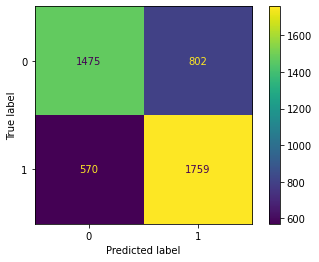

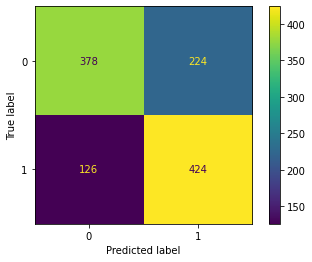

Text(0, 0.5, 'True Positive Rate')

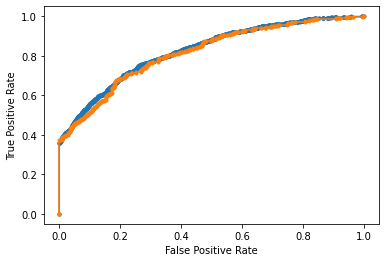

In [ ]:
print("train accuracy",accuracy_score(Y_pred_train,Y_train))
print("test accuracy",accuracy_score(Y_pred_test,Y_test))
print("Train precision=",precision_score(Y_pred_train,Y_train))
print("Test precision= ",precision_score(Y_pred_test,Y_test))
print("Train recall=   ",recall_score(Y_pred_train,Y_train))
print("Test recall    =",recall_score(Y_pred_test,Y_test))
print("Train roc_auc score=",roc_auc_score(Y_pred_train,Y_train))
print("Test roc_auc score =",roc_auc_score(Y_pred_test,Y_test))

cm_train=confusion_matrix(Y_train, Y_pred_train,labels=lr_cv.classes_)
cm_test=confusion_matrix(Y_test, Y_pred_test,labels=lr_cv.classes_)

p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()



plt.show()


fpr,tpr,_=roc_curve(Y_train,Y_train_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr,tpr,_=roc_curve(Y_test,Y_test_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#Applying Decision Tree on the data

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [ ]:
dt=DecisionTreeClassifier()
param_grid={'min_samples_split':[2,4,8,16],
            'min_samples_leaf':[3,4,5]}
dt=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc',cv=5)

In [ ]:
dt.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='roc_auc')

In [ ]:
y_predict_train=dt.predict(X_train)
y_predict_train_prob=dt.predict_proba(X_train)
y_predict_train_prob=y_predict_train_prob[:,1]

y_predict_test=dt.predict(X_test)
y_predict_test_prob=dt.predict_proba(X_test)
y_predict_test_prob=y_predict_test_prob[:,1]


Train accuracy 0.9218410768562745
Test  accuracy 0.8394097222222222
precision: 0.8978102189781022
precision: 0.8309090909090909
recall: 0.9448712155445097
recall: 0.8324225865209471


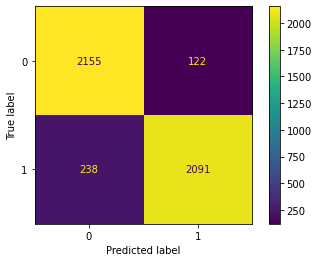

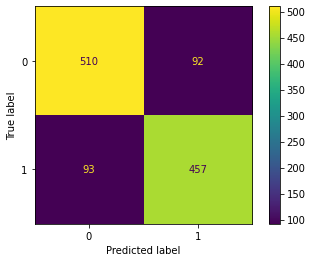

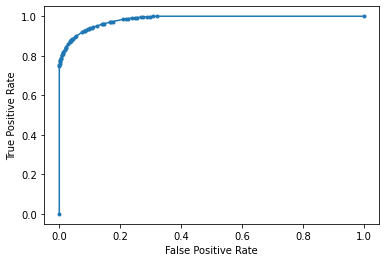

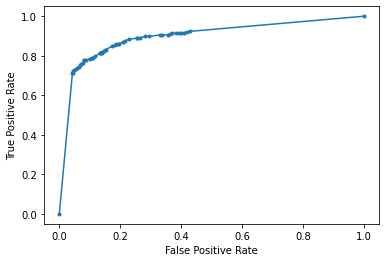

In [ ]:
roc_auc_score(y_predict_test,Y_test)

print("Train accuracy",accuracy_score(y_predict_train,Y_train))
print("Test  accuracy",accuracy_score(y_predict_test,Y_test))

print("precision:",precision_score(y_predict_train,Y_train))
print("precision:",precision_score(y_predict_test,Y_test))

print("recall:",recall_score(y_predict_train,Y_train))
print("recall:",recall_score(y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, y_predict_train,labels=dt.classes_)
cm_test=confusion_matrix(Y_test, y_predict_test,labels=dt.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()


fpr,tpr,_=roc_curve(Y_train,y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

fpr,tpr,_=roc_curve(Y_test,y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()





In [4]:
from sklearn.ensemble import RandomForestClassifier#for random forest(bagging)
from sklearn.ensemble import GradientBoostingClassifier#for gradient boosting(boosting) 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Random forest model

In [ ]:
rf=RandomForestClassifier()
param_grid={'n_estimators':[50,80,100,120],
            'min_samples_split':[2,4,8,16],
            'max_samples':[0.2,0.4,0.6,0.8],
            'min_samples_leaf':[3,4,5]}
rf=GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc',cv=5)

In [ ]:
rf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='roc_auc')

In [ ]:
Y_predict_train=rf.predict(X_train)
Y_predict_test=rf.predict(X_test)

Y_predict_train_prob=rf.predict_proba(X_train)
Y_predict_train_prob=Y_predict_train_prob[:,1]
Y_predict_test_prob=rf.predict_proba(X_test)
Y_predict_test_prob=Y_predict_test_prob[:,1]

roc_train: 0.9773670666882053
roc_test: 0.9138235975751071
train accuracy 0.976769431176726
test  accuracy 0.9114583333333334
precision: 0.9566337483898669
precision: 0.8745454545454545
recall: 0.9973142345568488
recall: 0.9357976653696498


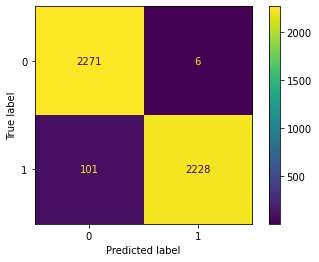

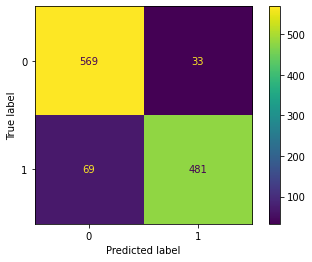

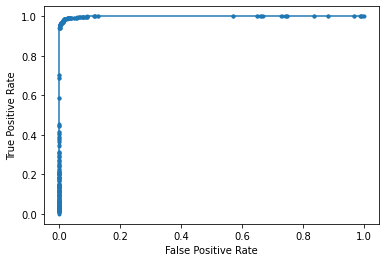

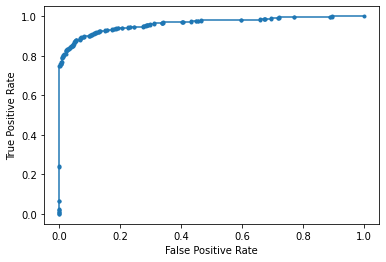

In [ ]:
print("roc_train:",roc_auc_score(Y_predict_train,Y_train))
print("roc_test:",roc_auc_score(Y_predict_test,Y_test))


print("train accuracy",accuracy_score(Y_predict_train,Y_train))
print("test  accuracy",accuracy_score(Y_predict_test,Y_test))

print("precision:",precision_score(Y_predict_train,Y_train))
print("precision:",precision_score(Y_predict_test,Y_test))

print("recall:",recall_score(Y_predict_train,Y_train))
print("recall:",recall_score(Y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, Y_predict_train)#,labels=rf.classes_)
cm_test=confusion_matrix(Y_test, Y_predict_test)#,labels=rf.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()



fpr,tpr,_=roc_curve(Y_train,Y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

fpr,tpr,_=roc_curve(Y_test,Y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()

In [ ]:
#best model as of now

In [ ]:
#Gradient Boosting

In [ ]:
gb=GradientBoostingClassifier()
param_grid={'n_estimators':[50,80,100,120],'min_samples_split':[2,5,8,10],'max_depth':[5,10,20,30],'min_samples_leaf':[3,4,5]}
gb=GridSearchCV(gb,param_grid=param_grid,scoring='roc_auc',cv=5)

In [ ]:
gb.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='roc_auc')

In [ ]:
Y_predict_train=gb.predict(X_train)
Y_predict_test=gb.predict(X_test)

Y_predict_train_prob=gb.predict_proba(X_train)
Y_predict_train_prob=Y_predict_train_prob[:,1]
Y_predict_test_prob=gb.predict_proba(X_test)
Y_predict_test_prob=Y_predict_test_prob[:,1]

roc_train: 1.0
roc_test: 0.9188403450182867
train accuracy 1.0
test accuracy 0.9157986111111112
precision: 1.0
precision: 0.8745454545454545
recall: 1.0
recall: 0.9449901768172888


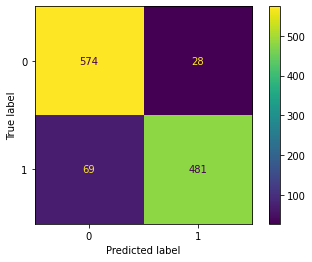

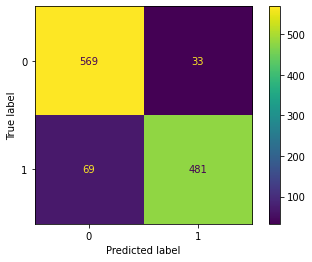

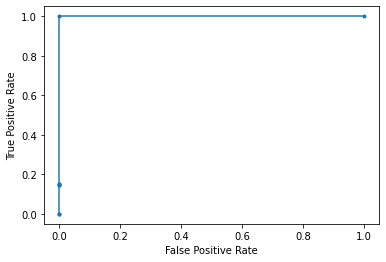

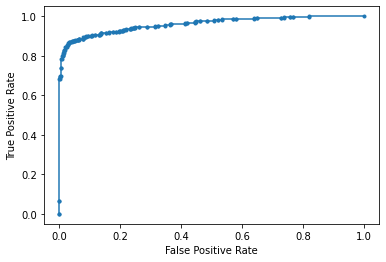

In [ ]:
print("roc_train:",roc_auc_score(Y_predict_train,Y_train))
print("roc_test:",roc_auc_score(Y_predict_test,Y_test))


print("train accuracy",accuracy_score(Y_predict_train,Y_train))
print("test accuracy",accuracy_score(Y_predict_test,Y_test))

print("precision:",precision_score(Y_predict_train,Y_train))
print("precision:",precision_score(Y_predict_test,Y_test))

print("recall:",recall_score(Y_predict_train,Y_train))
print("recall:",recall_score(Y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, Y_predict_train,labels=gb.classes_)
cm_train=confusion_matrix(Y_test, Y_predict_test,labels=gb.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()



fpr,tpr,_=roc_curve(Y_train,Y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


fpr,tpr,_=roc_curve(Y_test,Y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()




In [233]:
pip install xgboost==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.4
    Uninstalling xgboost-1.7.4:
      Successfully uninstalled xgboost-1.7.4


In [2]:
import xgboost as xgb

In [5]:
xg=xgb.XGBClassifier()
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
xg=GridSearchCV(xg,param_grid=param_grid,scoring='roc_auc',cv=5)

In [238]:
xg.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [239]:
Y_predict_train=xg.predict(X_train)
Y_predict_test=xg.predict(X_test)
Y_predict_train_prob=xg.predict_proba(X_train)
Y_predict_train_prob=Y_predict_train_prob[:,1]
Y_predict_test_prob=xg.predict_proba(X_test)
Y_predict_test_prob=Y_predict_test_prob[:,1]

roc_train: 0.9540555486265473
roc_test: 0.9208805031446542
accuracy 0.9504993486756405
accuracy 0.9123263888888888
precision: 0.9046801202232718
precision: 0.8418181818181818
recall: 0.9971604353999054
recall: 0.9706498951781971


NameError: ignored

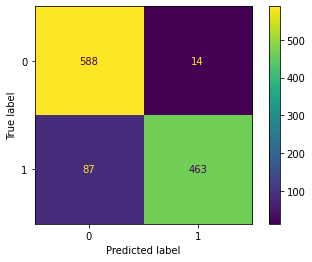

In [240]:
print("roc_train:",roc_auc_score(Y_predict_train,Y_train))
print("roc_test:",roc_auc_score(Y_predict_test,Y_test))


print("accuracy",accuracy_score(Y_predict_train,Y_train))
print("accuracy",accuracy_score(Y_predict_test,Y_test))

print("precision:",precision_score(Y_predict_train,Y_train))
print("precision:",precision_score(Y_predict_test,Y_test))

print("recall:",recall_score(Y_predict_train,Y_train))
print("recall:",recall_score(Y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, Y_predict_train,labels=xg.classes_)
cm_train=confusion_matrix(Y_test, Y_predict_test,labels=xg.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()



fpr,tpr,_=roc_curve(Y_train,Y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='XG Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


fpr,tpr,_=roc_curve(Y_test,Y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='XG Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()


In [ ]:
#in conclusion best performing model is Random Forest but there is overfitting happening. So XGBoosting is the best from overfiiting point of view

In [241]:
import pickle

In [242]:
pickle.dump(xg,open('model_xg1.pkl','wb'))